In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing import sequence
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [19]:
data = pd.read_csv('./datasets/data.csv', encoding='CP949')
target = pd.read_csv('./datasets/OECD신용등급.csv', encoding='CP949')
target.drop('신용등급_1', axis=1, inplace=True)

In [20]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='left')
datasets.columns = ['국가별', '시점', '인당_국민총소득', 'GDP_성장률', '디플레이터', '수출', '수입',
       '무역의존도_수출', '무역의존도_수입', '외환보유액', '부채비율', '국민부담률', '평균근로자세금', '경제활동참가율',
       '고용률', '실업률', '신용등급']
datasets['수입'] = datasets['수입'].astype(float)
datasets['무역의존도_수입'] = datasets['무역의존도_수입'].astype(float)
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        116 non-null    int64  
 1   인당_국민총소득  116 non-null    float64
 2   GDP_성장률   116 non-null    float64
 3   디플레이터     116 non-null    float64
 4   수출        116 non-null    float64
 5   수입        116 non-null    float64
 6   무역의존도_수출  116 non-null    float64
 7   무역의존도_수입  116 non-null    float64
 8   외환보유액     116 non-null    int64  
 9   부채비율      116 non-null    float64
 10  국민부담률     116 non-null    float64
 11  평균근로자세금   116 non-null    float64
 12  경제활동참가율   116 non-null    float64
 13  고용률       116 non-null    float64
 14  실업률       116 non-null    float64
 15  신용등급      116 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 14.6 KB


In [21]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_국민총소득,GDP_성장률,디플레이터,수출,수입,무역의존도_수출,무역의존도_수입,외환보유액,부채비율,국민부담률,평균근로자세금,경제활동참가율,고용률,실업률,신용등급
count,116.000000,116.000000,116.000000,116.000000,1.160000e+02,1.160000e+02,116.000000,116.000000,1.160000e+02,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1.689655,33475.815517,3.329310,95.595690,2.217822e+05,2.229416e+05,37.006552,37.020345,8.167653e+04,73.539026,34.313793,38.507759,60.153448,65.972414,8.257759,16.979940
std,1.058414,21025.028449,3.148085,13.460676,2.805340e+05,3.268235e+05,22.166097,21.632006,1.823440e+05,41.213343,6.950307,8.705592,5.940245,7.047338,4.170646,3.344374
min,0.000000,4070.600000,-5.500000,58.200000,3.092000e+03,3.919000e+03,7.440000,2.240000,2.790000e+02,6.788000,11.400000,14.700000,48.100000,46.300000,2.600000,3.900000
25%,1.000000,16716.900000,1.800000,87.700000,4.842350e+04,4.620275e+04,20.292500,22.902500,9.268750e+03,45.829500,30.500000,32.825000,57.025000,60.650000,5.100000,14.500000
50%,2.000000,30761.750000,2.950000,100.000000,1.204630e+05,8.910150e+04,31.785000,29.410000,3.073500e+04,63.252000,33.100000,38.800000,59.650000,66.100000,7.450000,18.000000
75%,3.000000,44388.900000,4.200000,103.700000,3.073575e+05,3.133178e+05,51.107500,50.787500,7.170775e+04,101.067500,39.250000,43.775000,63.125000,71.575000,9.925000,20.000000
max,3.000000,110886.000000,25.200000,143.100000,1.503400e+06,2.248800e+06,146.180000,137.700000,1.233153e+06,234.073000,48.000000,57.100000,81.400000,83.800000,24.900000,20.000000


In [22]:
datasets.iloc[:,15] = round(datasets.iloc[:,15]).astype(int)
datasets.iloc[:,15] = datasets.iloc[:,15].astype(str)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:15], datasets.iloc[:,15], test_size=0.2, random_state=42)

In [24]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_train = pd.get_dummies(y_train).values
y_train = sequence.pad_sequences(y_train, maxlen=15)
y_test = lb.fit_transform(y_test)
y_test = pd.get_dummies(y_test).values
y_test = sequence.pad_sequences(y_test, maxlen=15)

In [25]:
rf = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
acc = accuracy_score(pred, y_test)
print(f'acc : {acc}')

acc : 0.5


<AxesSubplot:>

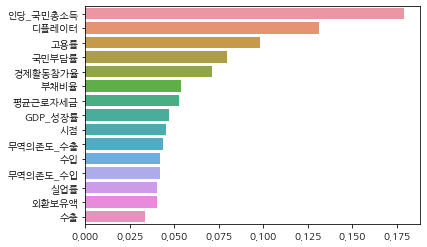

In [26]:
fi = pd.Series(rf.feature_importances_, rf.feature_names_in_)
fi = fi.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=fi.values, y=fi.index)

In [28]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_train_ss = pd.DataFrame(x_train_ss, columns=x_train.columns)
x_test_ss = ss.fit_transform(x_test)
x_test_ss = pd.DataFrame(x_test_ss, columns=x_test.columns)

rf1 = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
rf1.fit(x_train_ss, y_train)
pred = rf1.predict(x_test_ss)
acc = accuracy_score(pred, y_test)
print(f'acc : {acc}')

acc : 0.25


<AxesSubplot:>

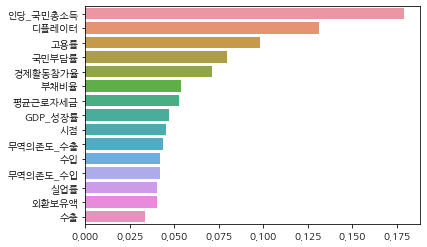

In [29]:
fi1 = pd.Series(rf1.feature_importances_, x_train_ss.columns)
fi1 = fi1.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=fi.values, y=fi.index)